In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import sys
import os.path
from run_multi import run_multiple
sys.path.append(
    os.path.abspath(os.path.dirname(os.path.abspath(''))))

from simulation import Parameters
from equations import solveDiscrete, decayLengthPhysical, get_kd, get_v
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import os

dat, norm, colorcoded, colorcodedlabel, x, t, mt_length = run_multiple()

1 diff: 0.0093  off from steady state: 6.292711021870417e-15 error in decay length: 0.013112526845951766
2 diff: 0.0093  off from steady state: 1.357967038523498e-12 error in decay length: 0.013112526845840078
3 diff: 0.0093  off from steady state: 3.3955468674132644e-12 error in decay length: 0.013112526845760586
4 diff: 0.0093  off from steady state: 4.555968509182638e-12 error in decay length: 0.07543476141175709
5 diff: 0.0093  off from steady state: -8.945515575947895e-14 error in decay length: 0.07543476141293082
6 diff: 0.0093  off from steady state: 2.656131298193116e-08 error in decay length: 0.07543476010019368
7 diff: 0.0093  off from steady state: 6.346068710371832e-05 error in decay length: 0.3419595669802111
8 diff: 0.0093  off from steady state: 6.346029692271876e-05 error in decay length: 0.3419595968619886
9 diff: 0.0093  off from steady state: 6.346203818892487e-05 error in decay length: 0.34195963700142507
10 diff: 0.0093  off from steady state: 8.313154054050086e-08

In [2]:
import dill
# dill.load_session('v14.db')
# dill.dump_session('v12.db')
try:
    os.mkdir("figs")
except:
    ""

# dill.dump_session('v14.db')
plotdat = dat

In [3]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=155)
filtered = list(filter(lambda condition: 0.4 < condition['alpha'] < 0.6 and condition['D'] == 0.0093, dat))
p = filtered[0]["p"]
filtered[0]["kon"] / (0.0016 * 50 + filtered[0]["kon"])



0.024390243902439025

In [4]:
font = {'size'   : 18}

matplotlib.rc('font', **font)
   
cmap = cm.gist_ncar
colors = cm.ScalarMappable(norm=norm, cmap=cmap)

def setMarker(val, permitted_values):
    if val == permitted_values[0]:
        return '^'
    elif val == permitted_values[1]:
        return 'o'
    elif val == permitted_values[2]:
        return 'x'
    elif val == permitted_values[3]:
        return '>'
    
def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

def df(plotdic, key):
    if isinstance(plotdic[0][key], float) or isinstance(plotdic[0][key], int):
        return np.array([dic[key] for dic in plotdic])
    else:
        return np.array([dic[key][-1] for dic in plotdic])
    
def standard_plot(plotdat, xkey, ykey):
    plt.figure(figsize=(5,5))
    unique_vals = list(set([dic['D'] + dic['koff'] for dic in plotdat]))
    color = df(plotdat,colorcoded)
    mscatter(df(plotdat,xkey),
         df(plotdat,ykey), 
         c=color,
         m=[setMarker(dic['D'] + dic['koff'], unique_vals) for dic in plotdat],
         s=200, facecolors='none', alpha=0.6, norm=norm, cmap=cmap, label=color)
    matplotlib.pyplot.colorbar(colors, label = colorcodedlabel)

# colors = list(set(df(plotdat,'omega')))

def saveallfigs(name):
    plt.savefig(name + ".svg", transparent=True)
    plt.savefig(name + ".png", transparent=True, bbox_inches='tight')

C:\Users\Marcel\AppData\Local\Temp\ipykernel_368\1156435926.py:50: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  matplotlib.pyplot.colorbar(colors, label = colorcodedlabel)


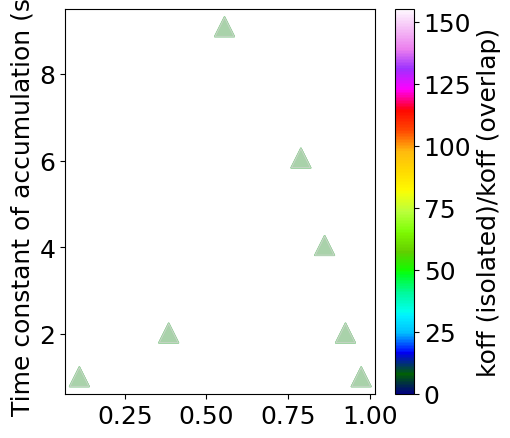

In [7]:
standard_plot(plotdat, 'alpha', 'accumulation/onsingle')
plt.ylabel('Accumulated molecules / \n number of additional molecules \n on isolated MT (1)')
# plt.xlabel("Ase1 density (1/protofilament dimer)")
# plt.ylim([0,25])
saveallfigs("figs/ase1 density vs accumulation divided by additional molecules on single ")

C:\Users\Marcel\AppData\Local\Temp\ipykernel_368\1156435926.py:50: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  matplotlib.pyplot.colorbar(colors, label = colorcodedlabel)


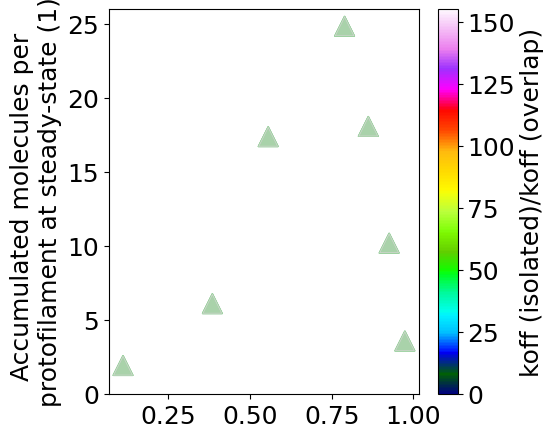

In [8]:
standard_plot(plotdat, 'alpha', 'accumulation')
plt.ylabel("Accumulated molecules per \nprotofilament at steady-state (1)")
# plt.xlabel("Ase1 density (1/protofilament dimer)")
plt.ylim(0)
saveallfigs("figs/ase1 density vs accumulated molecules")


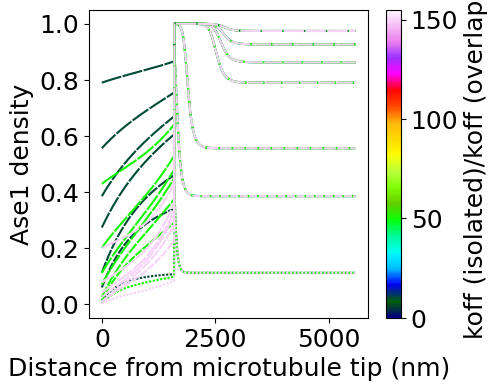

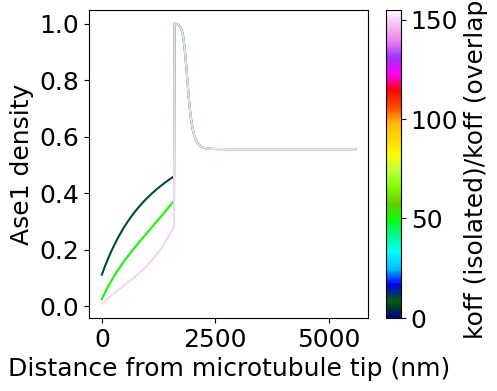

In [11]:
filtered = list(filter(lambda condition: 0.4 < condition['alpha'] < 0.6 and condition['D'] == 0.0093, plotdat))
plot = plt.figure(figsize=(4.5,4))
for curve in dat:
    solution = curve["solution"]
    y = solution[-1][:]
    dash = [curve["alpha"]*10, curve["D"]*75]
    plt.plot(x*1000,y, dashes = dash, color = colors.to_rgba(curve[colorcoded][-1] if hasattr(curve[colorcoded], "__len__") else curve[colorcoded]))

plt.xlabel("Distance from microtubule tip (nm)")
plt.ylabel("Ase1 density")
plt.colorbar(colors, ax = plt.gca(), label = colorcodedlabel)
saveallfigs("figs/distance versus Ase1 density")

plot = plt.figure(figsize=(4.5,4))
for curve in dat:
    if curve["alpha"] > 0.4 and curve["alpha"] < 0.6 and curve["D"] == 0.0093:
        solution = curve["solution"]
        y = solution[-1][:]
        dash = [curve["alpha"]*10, curve["D"]*75]
        plt.plot(x*1000,y, color = colors.to_rgba(curve[colorcoded][-1] if hasattr(curve[colorcoded], "__len__") else curve[colorcoded]))

plt.xlabel("Distance from microtubule tip (nm)")
plt.ylabel("Ase1 density")
plt.colorbar(colors, ax = plt.gca(), label = colorcodedlabel)
saveallfigs("figs/distance versus Ase1 density")